# Decision Tree Algorithm
From Scratch using Python

In [21]:
# For Python 2 / 3 compatability
from __future__ import print_function

In [22]:
# First two rows are features and last column
training_data = [
    ['Green', 3, 'Apple'],
    ['Yellow', 3, 'Apple'],
    ['Red', 1, 'Grape'],
    ['Blue', 2, 'Blueberry'],
    ['Red', 1, 'Grape'],
    ['Yellow', 3, 'Lemon'],
]

# Column Labels (Used to print the tree)
headers = ["colors",'diameter','label']

In [23]:
#Define a function to find a unique value for the column in the dataset
def unique_vals(rows, col):
    return set([row[col] for row in rows])

#Test the function
print(unique_vals(training_data, 0)) # Unique value in the first column

{'Green', 'Yellow', 'Red', 'Blue'}


In [24]:
#Define a function to count the number of each type of data in a dataset
def class_counts(rows):
    counts = {}  # a dictionary of label -> count.
    for row in rows:
        # in our dataset format, the label is always the last column
        label = row[-1]
        if label not in counts:
            counts[label] = 0
        counts[label] += 1
    return counts


#Test the function
class_counts(training_data)

{'Apple': 2, 'Blueberry': 1, 'Grape': 2, 'Lemon': 1}

In [25]:
#Define a function to check the value is interger or numeric
def is_numeric(value):
    return isinstance(value, int) or isinstance(value, float)

#Test the function
is_numeric(10)

True

**Question class is used to partition a dataset.**
This class just records a 'column number' (e.g., 0 for Color) and a
'column value' (e.g., Green).The 'match' method is used to compare
the feature value in an example to the feature value stored in the
question. See the demo below

In [32]:
class Question:

    def __init__(self, column, value):
        self.column = column
        self.value = value

# Compare the feature value in an example to the
# feature value in this question.
    def match(self, example):
        val = example[self.column]
        if is_numeric(val):
            return val >= self.value
        else:
            return val == self.value

# This is just a helper method to print
# the question in a readable format.
    def __repr__(self):
        condition = "=="
        if is_numeric(self.value):
            condition = ">="
        return "Is %s %s %s ?" % (
            headers[self.column], condition, str(self.value))
      

#Test the class
print(Question(1, 3))
print(Question(2, "Apple"))
print(Question(0, "Blue"))

Is diameter >= 3 ?
Is label == Apple ?
Is colors == Blue ?


In [36]:
#Check the Quection and Dataset working properly or not ?
# Let's create quection from the Question class
question1 = Question(0,"Blue")
question2 = Question(0,"Red")

# Let's take a sample data from the training_data
sample_data = training_data[3] # ['Blue', 2, 'Blueberry']

True

In [37]:
# Check
question1.match(sample_data) # should be TRUE

True

In [38]:
# Check
question2.match(sample_data) # should be FALSE, because the colour of blueberry should be BLUE

False

In [42]:
# Define a function to partion data in to TRUE and FALSE columns
def partition(rows, question):
    true_rows, false_rows = [], [] # Define two list for FALSE and TRUE
    for row in rows:
        if question.match(row):
            true_rows.append(row)
        else:
            false_rows.append(row)
    return true_rows, false_rows

# Test the function using Partition Function and Question Function
true_rows, false_rows = partition(training_data, Question(0, 'Blue'))
print('TRUE Dataset : ',true_rows)
print('FALSE Dataset : ',false_rows)

TRUE Dataset :  [['Blue', 2, 'Blueberry']]
FALSE Dataset :  [['Green', 3, 'Apple'], ['Yellow', 3, 'Apple'], ['Red', 1, 'Grape'], ['Red', 1, 'Grape'], ['Yellow', 3, 'Lemon']]


Gini impurity is a measure of how often a randomly chosen element from the set would be incorrectly labeled if it was randomly labeled according to the distribution of labels in the subset.

Different between Gini and Entropy [Click](https://quantdare.com/decision-trees-gini-vs-entropy/)

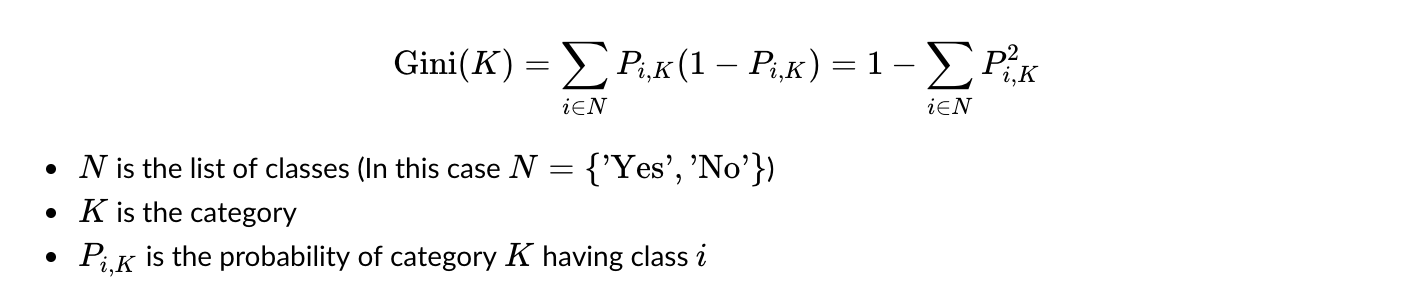

In [43]:
# There are various method to calculate the Gini Impurity for a list of rows
# Define a function to calculate Gini Impurity
def gini(rows):
    counts = class_counts(rows)
    impurity = 1
    for lbl in counts:
        prob_of_lbl = counts[lbl] / float(len(rows))
        impurity -= prob_of_lbl**2
    return impurity

In [44]:
# Test the gini() function with un-mixed list of data
test_gini_unmixed = [['Apple'],['Apple']]
gini(test_gini_unmixed) # Should be 0, because the no different data

0.0

In [48]:
# Test the gini() function with mixed list of data
test_gini_unmixed = [['Lemon'],['Apple']]
gini(test_gini_unmixed) # Should be 0.5, because there two type of data

0.5

Information gain is the reduction in entropy or surprise by transforming a dataset and is often used in training decision trees. Information gain is calculated by comparing the entropy of the dataset before and after a transformation

Read More : Gini Index and Information Gain | Entropy and Information Gain [Click](http://www.learnbymarketing.com/481/decision-tree-flavors-gini-info-gain/#:~:text=Summary%3A%20The%20Gini%20Index%20is,of%20each%20class%20from%20one.&text=Information%20Gain%20multiplies%20the%20probability,2)

The uncertainty of the starting node, minus the weighted impurity of two child nodes.
    

In [51]:
# Define the function to calculate the Information Gain of the tree
def info_gain(left, right, current_uncertainty):
    p = float(len(left)) / (len(left) + len(right))
    return current_uncertainty - p * gini(left) - (1 - p) * gini(right)

In [52]:
# Check the all function
current_uncertainty = gini(training_data)
print('Gini Impurities : ',current_uncertainty)

Gini Impurities :  0.7222222222222221


In [53]:
# Data Gaining when partitioning on GREEN
true_rows, false_rows = partition(training_data, Question(0, 'Green'))
print('Information Gain of GREEN : ',info_gain(true_rows, false_rows, current_uncertainty))

Information Gain of GREEN :  0.12222222222222223


In [54]:
# Data Gaining when partitioning on RED
true_rows, false_rows = partition(training_data, Question(0, 'Red'))
print('Information Gain of RED : ',info_gain(true_rows, false_rows, current_uncertainty))

Information Gain of RED :  0.30555555555555536


In [55]:
# It looks like we learned more using 'Red' (0.37), than 'Green' (0.14).
# Why? Look at the different splits that result, and see which one
# looks more 'unmixed' to you.
true_rows, false_rows = partition(training_data, Question(0,'Red'))

print('TRUE Dataset : ',true_rows)
print('FALSE Dataset : ',false_rows)

TRUE Dataset :  [['Red', 1, 'Grape'], ['Red', 1, 'Grape']]
FALSE Dataset :  [['Green', 3, 'Apple'], ['Yellow', 3, 'Apple'], ['Blue', 2, 'Blueberry'], ['Yellow', 3, 'Lemon']]


In [57]:
#Define a model to find the best question to ask by iterating over every feature / value and calculating the information gain
def find_best_split(rows):
    best_gain = 0  # keep track of the best information gain
    best_question = None  # keep train of the feature / value that produced it
    current_uncertainty = gini(rows)
    n_features = len(rows[0]) - 1  # number of columns

    for col in range(n_features):  # for each feature

        values = set([row[col] for row in rows])  # unique values in the column

        for val in values:  # for each value

            question = Question(col, val)

            # try splitting the dataset
            true_rows, false_rows = partition(rows, question)

            # Skip this split if it doesn't divide the
            # dataset.
            if len(true_rows) == 0 or len(false_rows) == 0:
                continue

            # Calculate the information gain from this split
            gain = info_gain(true_rows, false_rows, current_uncertainty)

            # You actually can use '>' instead of '>=' here
            # but I wanted the tree to look a certain way
            if gain >= best_gain:
                best_gain, best_question = gain, question

    return best_gain, best_question

In [58]:
#Test the Function
best_gain, best_question = find_best_split(training_data)
best_question

Is diameter >= 2 ?

In [59]:
# Create two classes as Leaf and Decision_Node. Leaf classify the data and Decision_Node ask thwe quecction

# Lead Class
class Leaf:
    def __init__(self, rows):
        self.predictions = class_counts(rows)

# Decision_Node Class
class Decision_Node:
    def __init__(self,
                 question,
                 true_branch,
                 false_branch):
        self.question = question
        self.true_branch = true_branch
        self.false_branch = false_branch

In [60]:
# Define Function to build the tree
def build_tree(rows):

    # Try partitioing the dataset on each of the unique attribute,
    # calculate the information gain,
    # and return the question that produces the highest gain.
    gain, question = find_best_split(rows)

    # Base case: no further info gain
    # Since we can ask no further questions,
    # we'll return a leaf.
    if gain == 0:
        return Leaf(rows)

    # If we reach here, we have found a useful feature / value
    # to partition on.
    true_rows, false_rows = partition(rows, question)

    # Recursively build the true branch.
    true_branch = build_tree(true_rows)

    # Recursively build the false branch.
    false_branch = build_tree(false_rows)

    # Return a Question node.
    # This records the best feature / value to ask at this point,
    # as well as the branches to follow
    # dependingo on the answer.
    return Decision_Node(question, true_branch, false_branch)

In [65]:
# Define functionto print the tree
def print_tree(node, spacing=""):

    # Base case: we've reached a leaf
    if isinstance(node, Leaf):
        print (spacing + "Predict", node.predictions)
        return

    # Print the question at this node
    print (spacing + str(node.question))

    # Call this function recursively on the true branch
    print (spacing + '--> True:')
    print_tree(node.true_branch, spacing + "  ")

    # Call this function recursively on the false branch
    print (spacing + '--> False:')
    print_tree(node.false_branch, spacing + "  ")

In [62]:
my_tree = build_tree(training_data)

In [66]:
print_tree(my_tree)

Is diameter >= 2 ?
--> True:
  Is diameter >= 3 ?
  --> True:
    Is colors == Yellow ?
    --> True:
      Predict {'Apple': 1, 'Lemon': 1}
    --> False:
      Predict {'Apple': 1}
  --> False:
    Predict {'Blueberry': 1}
--> False:
  Predict {'Grape': 2}


In [67]:
# Define a function to get the all rules of recursion
def classify(row, node):

    # Base case: we've reached a leaf
    if isinstance(node, Leaf):
        return node.predictions

    # Decide whether to follow the true-branch or the false-branch.
    # Compare the feature / value stored in the node,
    # to the example we're considering.
    if node.question.match(row):
        return classify(row, node.true_branch)
    else:
        return classify(row, node.false_branch)

# Test
classify(training_data[0], my_tree)

{'Apple': 1}

In [69]:
# Define function to get the probability of decision
def print_leaf(counts):
    total = sum(counts.values()) * 1.0
    probs = {}
    for lbl in counts.keys():
        probs[lbl] = str(int(counts[lbl] / total * 100)) + "%"
    return probs

# Test 1
print_leaf(classify(training_data[0], my_tree))

{'Apple': '50%', 'Lemon': '50%'}

In [70]:
# Test 2
print_leaf(classify(training_data[1], my_tree))

{'Apple': '50%', 'Lemon': '50%'}

In [71]:
# Testing the Model 
testing_data = [
    ['Green', 3, 'Apple'],
    ['Yellow', 4, 'Apple'],
    ['Red', 2, 'Grape'],
    ['Red', 1, 'Grape'],
    ['Yellow', 3, 'Lemon'],
]

for row in testing_data:
    print ("Actual: %s. Predicted: %s" %
           (row[-1], print_leaf(classify(row, my_tree))))

Actual: Apple. Predicted: {'Apple': '100%'}
Actual: Apple. Predicted: {'Apple': '50%', 'Lemon': '50%'}
Actual: Grape. Predicted: {'Blueberry': '100%'}
Actual: Grape. Predicted: {'Grape': '100%'}
Actual: Lemon. Predicted: {'Apple': '50%', 'Lemon': '50%'}
